
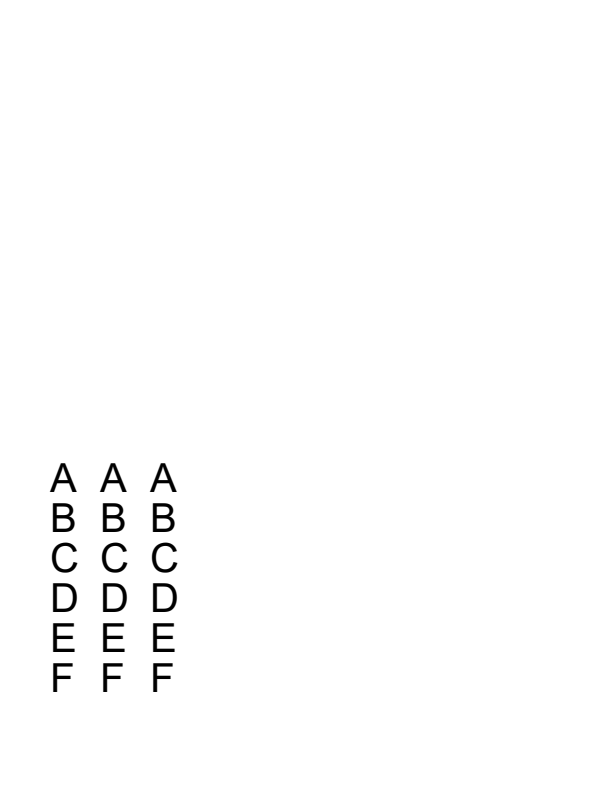

In [16]:
#!import "setup.ipynb"

using PdfLexer.Writing;

var doc = PdfDocument.Create();
var pg = doc.AddPage();
{

    var f1 = new FormWriter();
    f1.Font(Base14.Helvetica, 40)
        .Text("A")
        .NewLine()
        .Text("B")
        .TextShift(0, -40)
        .Text("C")
        .NewLine()
        .Text("D")
        .ResetText()
        .Translate(0, -160)
        .Text("E")
        .NewLine()
        .Text("F");
    var form = f1.Complete();

    var f2 = new FormWriter();
    f2.Font(Base14.Helvetica, 40)
        .Translate(50, 0)
        .Save()
        .Text("A")
        .NewLine()
        .Text("B")
        .TextShift(0, -40)
        .Text("C")
        .NewLine()
        .Text("D")
        .ResetText()
        .Translate(0, -160)
        .Text("E")
        .NewLine()
        .Text("F")
        .Restore()
        .Translate(50, 0)
        .Form(form);
    var form2 = f2.Complete();

    using var writer = pg.GetWriter();
    writer.Font(Base14.Helvetica, 40)
        .Save()
        .Translate(50, 300)
        .Text("A")
        .NewLine()
        .Text("B")
        .TextShift(0, -40)
        .Text("C")
        .NewLine()
        .Text("D")
        .ResetText()
        .Translate(0, -160)
        .Text("E")
        .NewLine()
        .Text("F")
        .Restore()
        .Translate(50, 300)
        .Form(form2);
}

display(pg);

## Mutable Content Model

Page content model can be created using `PdfPage.GetContentModel()`. The method accepts a boolean to flatten forms (default false). Form flattening can have adverse side effects in some advanced scenarios (mainly with transparency group handling). When form flattening is true any references forms will be merged into the main content view  all content will be returned in a single list.

In [17]:
using PdfLexer.Writing;
using PdfLexer.Content.Model;
{
    
    
    var model = pg.GetContentModel();

    display(model.First().Type);
}

Text

TODO types:

    Text,
    Paths,
    Image,
    Form,
    Shading,


TODO: CachedContentMutation

In [18]:



{
    var formReader = new CachedContentMutation(f => { 
            var bb = f.GetBoundingBox();
            if (f is TextContent<double> txt && txt.EnumerateCharacters().Any(x=> x== 'A')) {
                display(f);
            }
            if (bb.LLy > 200) {
                f.Transform(new GfxMatrix<double> { E = -40, F = 40 });
            } else {
                f.Transform(new GfxMatrix<double> { E = 40, F = -40 });
            }
            return f; 
        });

    var pg2 = formReader.Mutate(pg);


    display(pg2);
}

Error: (7,53): error CS1061: 'TextContent<double>' does not contain a definition for 'EnumerateCharacters' and no accessible extension method 'EnumerateCharacters' accepting a first argument of type 'TextContent<double>' could be found (are you missing a using directive or an assembly reference?)